In [1]:
# Library Imports
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings

In [53]:
# Global Variables
data_path = '../data/raw/'
processed_data_path = '../data/processed/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']
warnings.filterwarnings("ignore") # Ignore deprecation warnings

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    df.reset_index(drop=True, inplace=True)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

def standardize_column_names(columns):
    mapping = [ (' ', '_'), ('[', ''), (']\(', '_'), ('\)', '') , ('/', '_'), (':', '_')]
    for k, v in mapping:
        columns = columns.str.replace(k, v)
    return columns

In [60]:
df = build_dataframe(get_all_csv_filenames(data_path))
df.info() # Shows the rows count and the types
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [62]:
df.to_csv(processed_data_path + 'energy_data.csv', index=False)

In [64]:
df = pd.read_csv(processed_data_path + 'energy_data.csv')
df.columns = standardize_column_names(df.columns)
df.info() # Shows the rows count and the types
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Date_Time                                280320 non-null  object 
 1   Electricity_Facility_kW_Hourly           280320 non-null  float64
 2   Fans_Electricity_kW_Hourly               280320 non-null  float64
 3   Cooling_Electricity_kW_Hourly            280320 non-null  float64
 4   Heating_Electricity_kW_Hourly            280320 non-null  float64
 5   InteriorLights_Electricity_kW_Hourly     280320 non-null  float64
 6   InteriorEquipment_Electricity_kW_Hourly  280320 non-null  float64
 7   Gas_Facility_kW_Hourly                   280320 non-null  float64
 8   Heating_Gas_kW_Hourly                    280320 non-null  float64
 9   InteriorEquipment_Gas_kW_Hourly          157680 non-null  float64
 10  Water_Heater_WaterSystems_Gas_kW

,Date_Time,Electricity_Facility_kW_Hourly,Fans_Electricity_kW_Hourly,Cooling_Electricity_kW_Hourly,Heating_Electricity_kW_Hourly,InteriorLights_Electricity_kW_Hourly,InteriorEquipment_Electricity_kW_Hourly,Gas_Facility_kW_Hourly,Heating_Gas_kW_Hourly,InteriorEquipment_Gas_kW_Hourly,Water_Heater_WaterSystems_Gas_kW_Hourly,building_type,location,Electricity_Facility_kW_Monthly,Gas_Facility_kW_Monthly
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [4]:
for building_type in df.building_type.unique():
    print(building_type)

FullServiceRestaurant
Hospital
LargeHotel
LargeOffice
MediumOffice
MidriseApartment
OutPatient
PrimarySchool
QuickServiceRestaurant
SecondarySchool
SmallHotel
SmallOffice
Stand-aloneRetail
StripMall
SuperMarket
Warehouse


## Data Cleaning
### 1. Dropping unnecessary columns
The following columns have no values
<ol>
    <li>Electricity:Facility [kW](Monthly)</li>
    <li>Gas:Facility [kW](Monthly)</li>
</ol>

In [66]:
cols_to_remove = ["Electricity_Facility_kW_Monthly", "Gas_Facility_kW_Monthly"]
df.drop(cols_to_remove, inplace=True, axis=1)
df.head()

,Date_Time,Electricity_Facility_kW_Hourly,Fans_Electricity_kW_Hourly,Cooling_Electricity_kW_Hourly,Heating_Electricity_kW_Hourly,InteriorLights_Electricity_kW_Hourly,InteriorEquipment_Electricity_kW_Hourly,Gas_Facility_kW_Hourly,Heating_Gas_kW_Hourly,InteriorEquipment_Gas_kW_Hourly,Water_Heater_WaterSystems_Gas_kW_Hourly,building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA


We drop all the individual electric and gas columns and leave the aggregate colums

In [5]:
cols_to_remove = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)','Heating:Electricity [kW](Hourly)'
                                              ,'InteriorLights:Electricity [kW](Hourly)','InteriorEquipment:Electricity [kW](Hourly)'
                                              ,'Heating:Gas [kW](Hourly)','InteriorEquipment:Gas [kW](Hourly)','Water Heater:WaterSystems:Gas [kW](Hourly)'
                                              ]
df_aggregate_only = df.drop(cols_to_remove, axis=1)
df_aggregate_only.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA


### 2. Standardize column names
Standardize column names by replacing spaces & special characters with underscores

In [8]:
df_aggregate_only.columns = standardize_column_names(df_aggregate_only.columns)
df_aggregate_only.head()

,Date_Time,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly,building_type,location
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA


### 3. Label encoding
Label encode building type and location

In [9]:
df_aggregate_le = df_aggregate_only.copy()
df_aggregate_le['building_type'] = LabelEncoder().fit_transform(df_aggregate_le['building_type'].values)
df_aggregate_le['location']= LabelEncoder().fit_transform(df_aggregate_le['location'].values) 
df_aggregate_le.head()

,Date_Time,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly,building_type,location
0,01/01 01:00:00,22.545838,61.536209,0,0
1,01/01 02:00:00,14.745113,3.359880,0,0
2,01/01 03:00:00,14.760728,3.931953,0,0
3,01/01 04:00:00,14.766270,3.359880,0,0
4,01/01 05:00:00,14.918930,3.931959,0,0


## EDA
## 1. Correlation heatmap
Correlation heatmaps show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

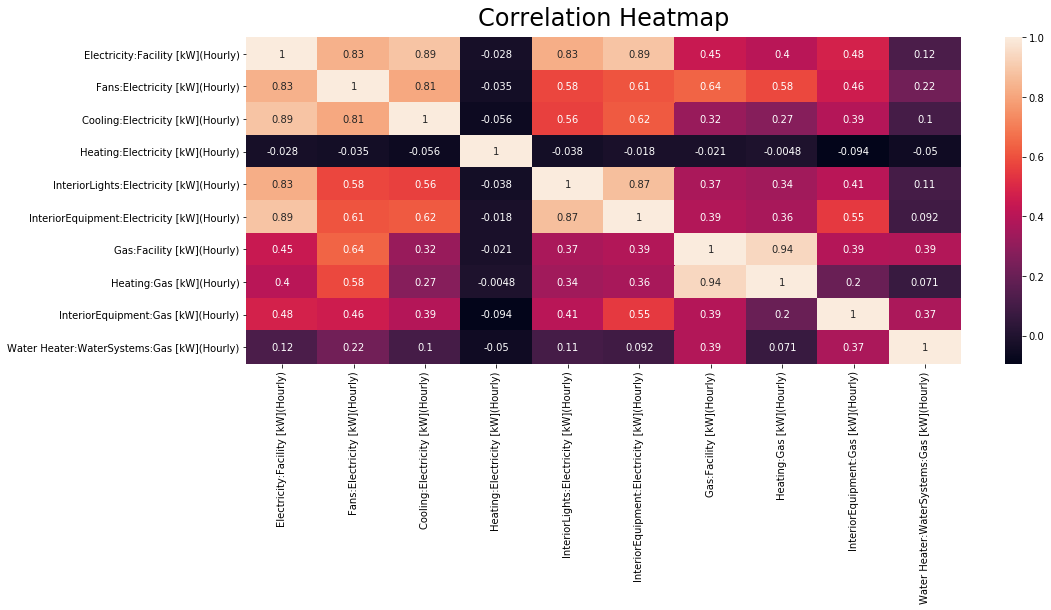

In [9]:
plt.figure(figsize=(16, 6))
corrMatrix = df.corr()
heatmap = sns.heatmap(corrMatrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
plt.show()

## Correlation Matrix Insights
- There is weak correlation between Heating:Electricity \[kW](Hourly) and all other rows & columns. This probably means most of the buildings are using gas instead of electricity for heating.
- This is also evident in the correlation between Heating:Gas \[kW](Hourly) and Gas:Facility \[kW](Hourly). These columns show a high correlation of 0.94 which would also strongly suggest that gas is used for heating in most buildings in this dataset.
- Along the first column, Fans:Electricity \[kW](Hourly), Cooling:Electricity \[kW](Hourly), InteriorLights:Electricity \[kW](Hourly), InteriorEquipment:Electricity \[kW](Hourly) are all highly correlated to the Electricity:Facility \[kW](Hourly).


Because of the high correlation between the individual electricity columns, we decided its better to drop both the individual electric and gas columns and use the aggregate columns Electricity:Facility \[kW](Hourly) & Gas:Facility \[kW](Hourly)

## 2. Pairs Plot
A pairs plot shows pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

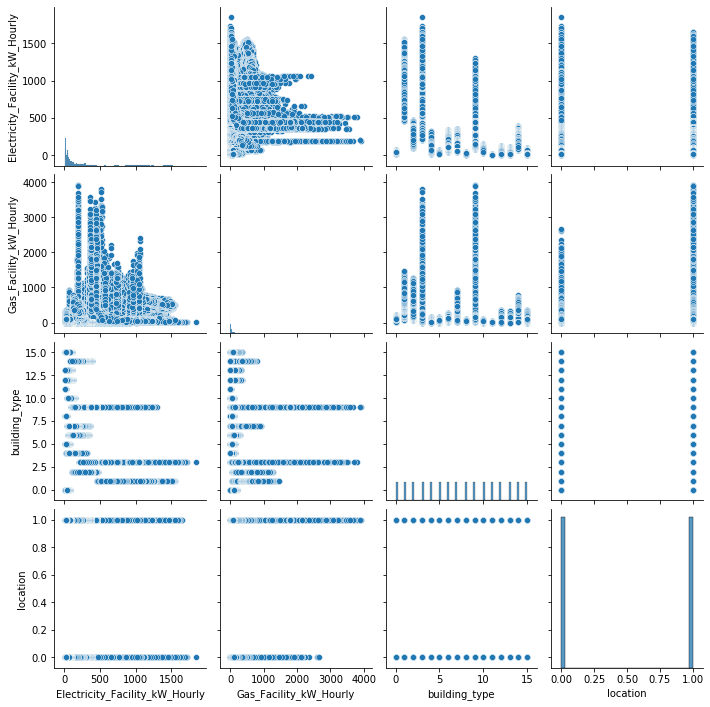

In [43]:
sns.pairplot(df_aggregate_le)
# plt.title('Pairs Plot Energy Dataset', fontsize=20, y=50) # how do we set the y coordinate for the title?
plt.show()

In [11]:
# distribution chart for energy usage per building type
# avg load per hour per building type
df_aggregate_le
df_aggregate_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date_Time                       280320 non-null  object 
 1   Electricity_Facility_kW_Hourly  280320 non-null  float64
 2   Gas_Facility_kW_Hourly          280320 non-null  float64
 3   building_type                   280320 non-null  int32  
 4   location                        280320 non-null  int32  
dtypes: float64(2), int32(2), object(1)
memory usage: 8.6+ MB


In [10]:
df_aggregate_le[['date', 'time']] = df_aggregate_le['Date_Time'].str.split('  ', expand=True)
df_aggregate_le[['month', 'day']] = df_aggregate_le['date'].str.split('/', expand=True)
df_aggregate_le.drop(columns=['Date_Time', 'date'], inplace=True)
df_aggregate_le

,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly,building_type,location,time,month,day
0,22.545838,61.536209,0,0,01:00:00,01,01
1,14.745113,3.359880,0,0,02:00:00,01,01
2,14.760728,3.931953,0,0,03:00:00,01,01
3,14.766270,3.359880,0,0,04:00:00,01,01
4,14.918930,3.931959,0,0,05:00:00,01,01
...,...,...,...,...,...,...,...
280315,18.511713,60.633698,15,1,20:00:00,12,31
280316,19.655896,82.036381,15,1,21:00:00,12,31
280317,19.063661,70.727347,15,1,22:00:00,12,31
280318,20.442228,98.965980,15,1,23:00:00,12,31


In [13]:
df_aggregate_le.drop(columns=['location', 'building_type']).groupby(['time']).mean()

,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly
time,,
01:00:00,120.215870,53.118953
02:00:00,118.144278,51.594263
03:00:00,116.700303,51.551498
04:00:00,121.613972,54.490193
05:00:00,127.042705,68.129283
06:00:00,175.204829,101.017257
07:00:00,211.667061,162.563640
08:00:00,251.029810,159.927170
09:00:00,269.631332,136.672583


Text(0.5, 1.0, 'Average Energy Usage by Hour')

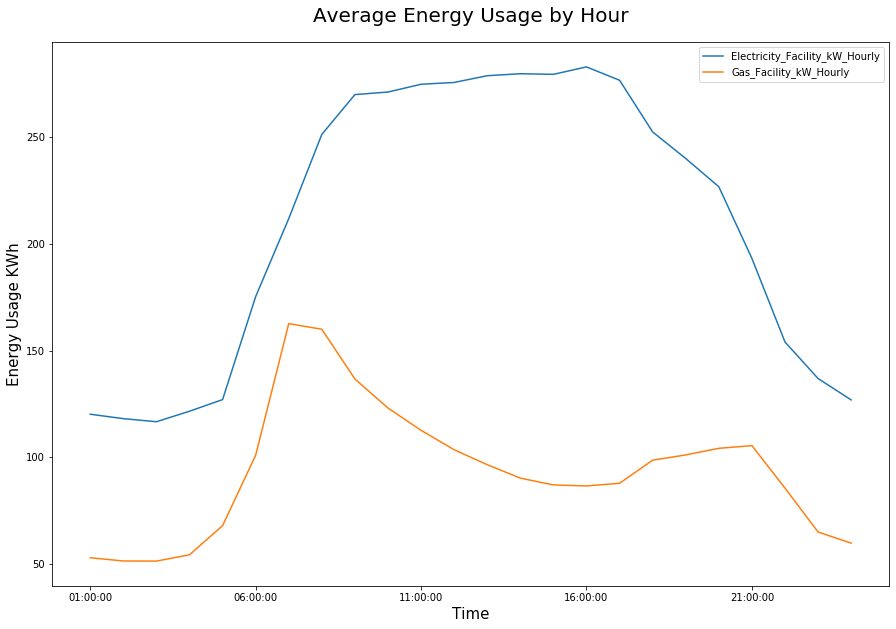

In [14]:
df_aggregate_le.drop(columns=['location', 'building_type']).groupby(['time']).mean().plot(figsize=(15,10))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Energy Usage KWh', fontsize=15)
plt.title('Average Energy Usage by Hour', fontsize=20, pad=20)

In [24]:
df_aggregate_only[['date', 'time']] = df_aggregate_only['Date_Time'].str.split('  ', expand=True)
df_aggregate_only[['month', 'day']] = df_aggregate_only['date'].str.split('/', expand=True)
df_aggregate_only.drop(columns=['Date_Time', 'date'], inplace=True)
df_aggregate_only

,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly,building_type,location,time,month,day
0,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA,01:00:00,01,01
1,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA,02:00:00,01,01
2,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA,03:00:00,01,01
3,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA,04:00:00,01,01
4,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA,05:00:00,01,01
...,...,...,...,...,...,...,...
280315,18.511713,60.633698,Warehouse,IL_CHICAGO-OHARE,20:00:00,12,31
280316,19.655896,82.036381,Warehouse,IL_CHICAGO-OHARE,21:00:00,12,31
280317,19.063661,70.727347,Warehouse,IL_CHICAGO-OHARE,22:00:00,12,31
280318,20.442228,98.965980,Warehouse,IL_CHICAGO-OHARE,23:00:00,12,31


In [38]:
df_aggregate_only.drop(columns=['location']).groupby(['building_type']).mean()

,Electricity_Facility_kW_Hourly,Gas_Facility_kW_Hourly
building_type,,
FullServiceRestaurant,37.898636,52.085912
Hospital,1092.160181,476.131127
LargeHotel,288.536659,306.191978
LargeOffice,755.248134,105.383118
MediumOffice,86.245891,4.693322
MidriseApartment,29.349097,18.839450
OutPatient,159.713249,92.434297
PrimarySchool,106.086587,46.624334
QuickServiceRestaurant,22.723180,28.534203


Text(0.5, 1.0, 'Average Energy Usage by Building Type')

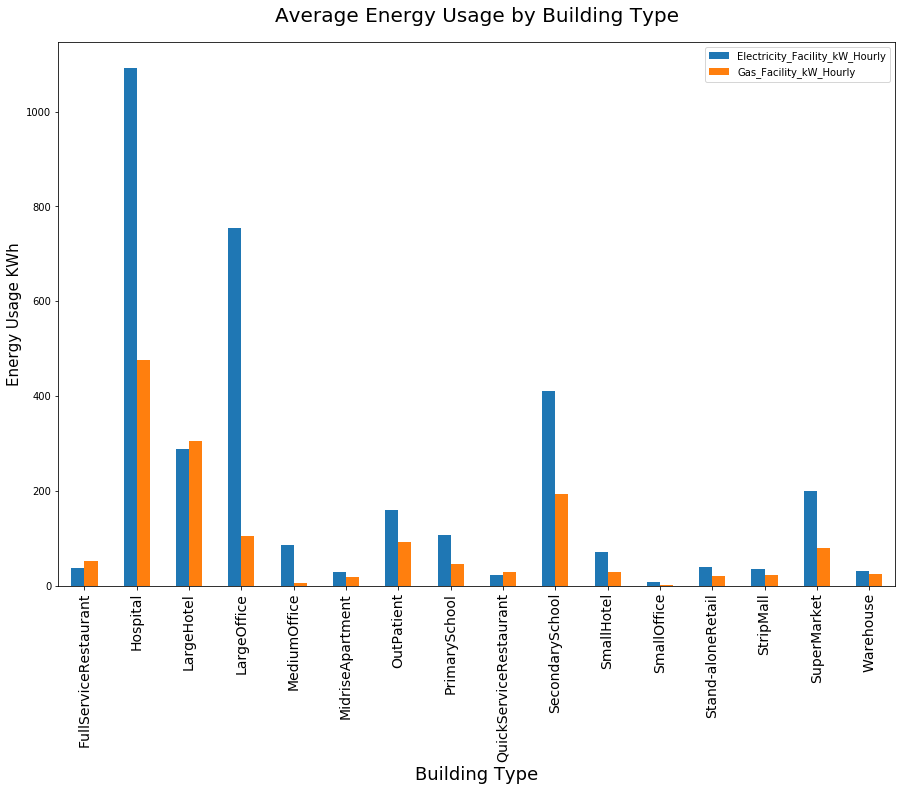

In [8]:
df_aggregate_only.drop(columns=['location']).groupby(['building_type']).mean().plot(figsize=(15,10), kind='bar')
plt.xlabel('Building Type', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Energy Usage KWh', fontsize=15)
plt.title('Average Energy Usage by Building Type', fontsize=20, pad=20)

In [ ]:
# @TODOs
# Increase Legend text size for all plots
# Average Energy Usage by Building Type plot
    # Change to horizontal orientation
    # Sort from largest to smallest value
# Add Pairs plot title
# Convert Mean Electric_Facility by day plot (Jude.ipynb) to use day of week & plot to see which day of the week has the highest peak
# Combine Mean Electric_Facility by month & Mean Gas_Facility by month plots (Jude.ipynb)
# df.describe dataset and translate those results to find clues for real outliers - then do some box plots
# do some unsupervised plots to find patterns?
# build a dashboard to determine energy forecast for building type, location or time
# how do we get a bigger pairs plot of as shown on jude.ipynb so we can discuss some of the cols separately

In [21]:
df_label_encoded = df.copy()
df_label_encoded['building_type'] = LabelEncoder().fit_transform(df['building_type'].values)
df_label_encoded['location']= LabelEncoder().fit_transform(df['location'].values) 
df_label_encoded.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,0,0
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,0,0
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,0,0


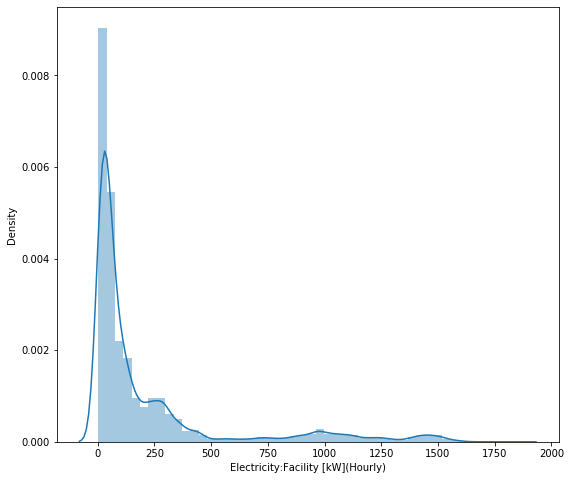

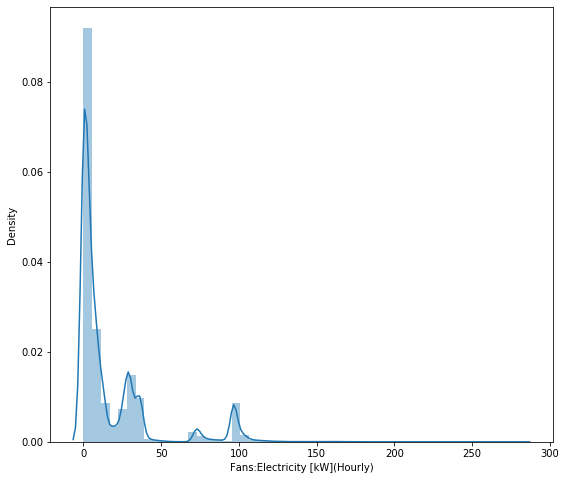

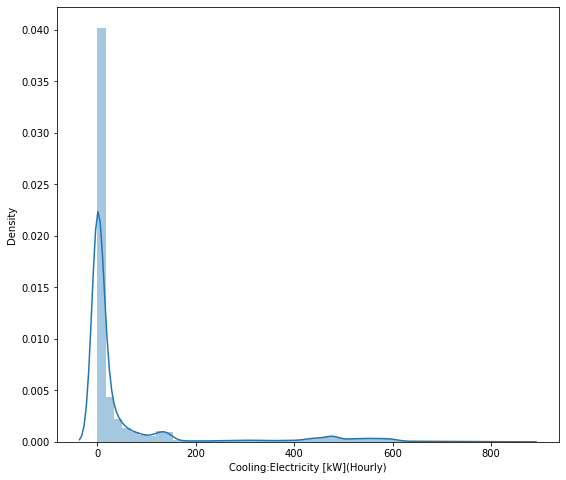

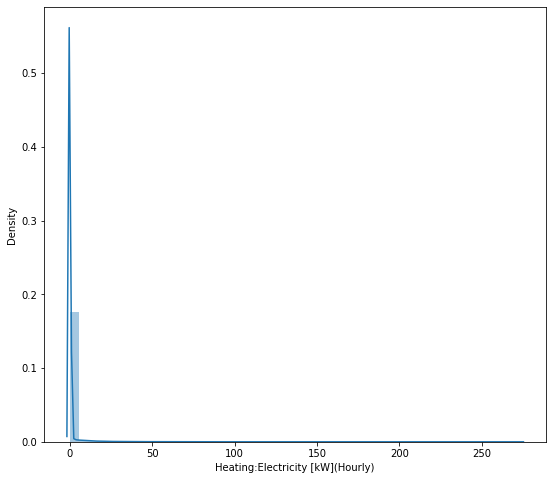

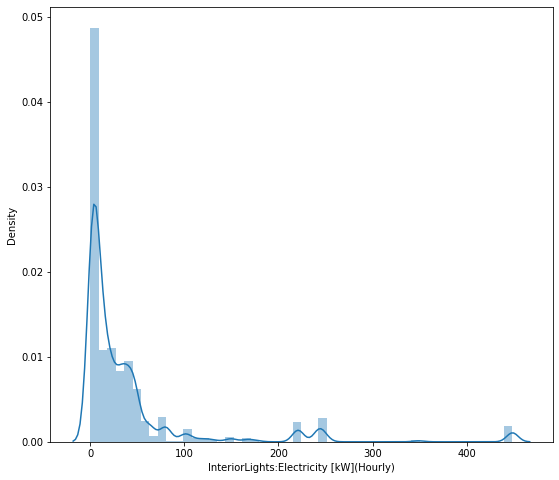

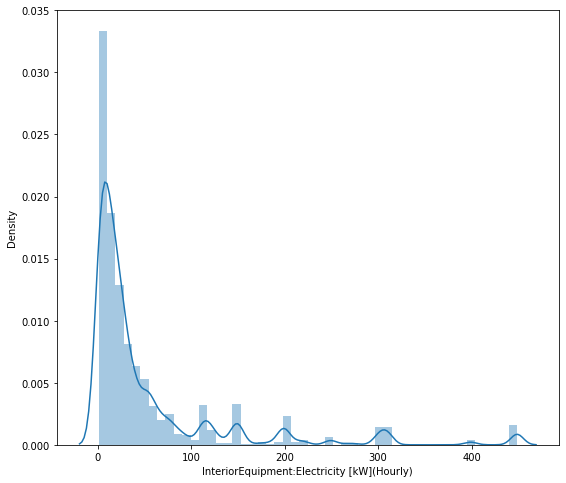

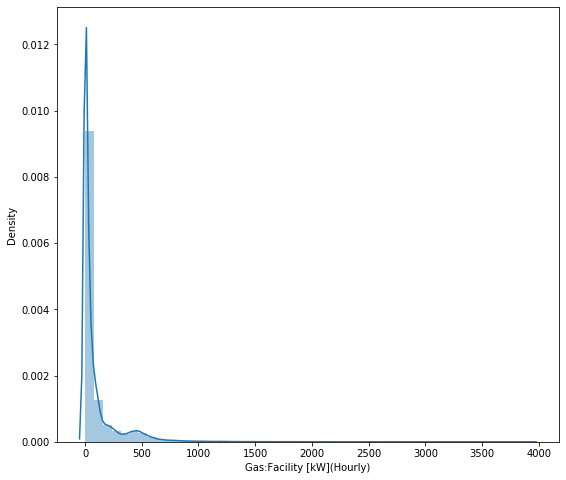

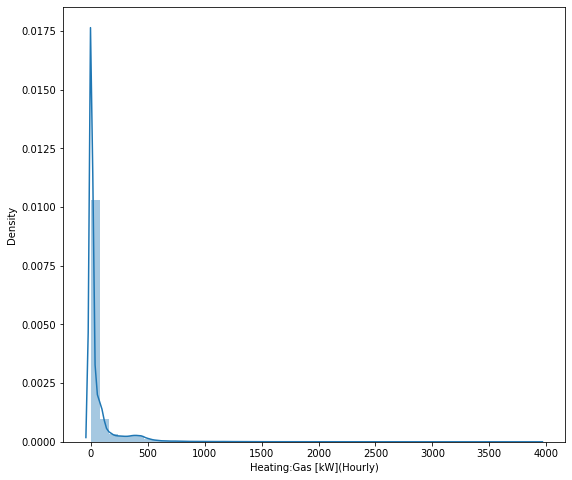

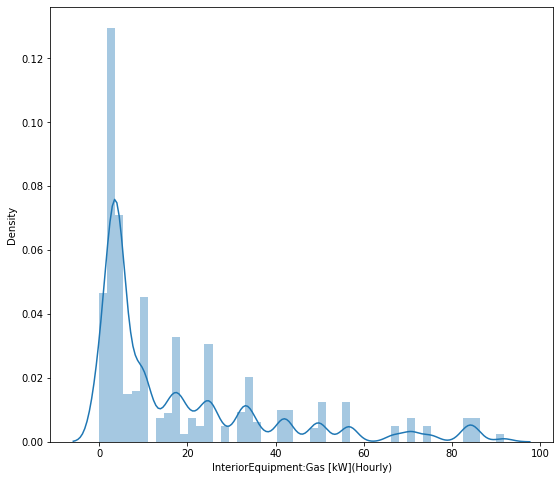

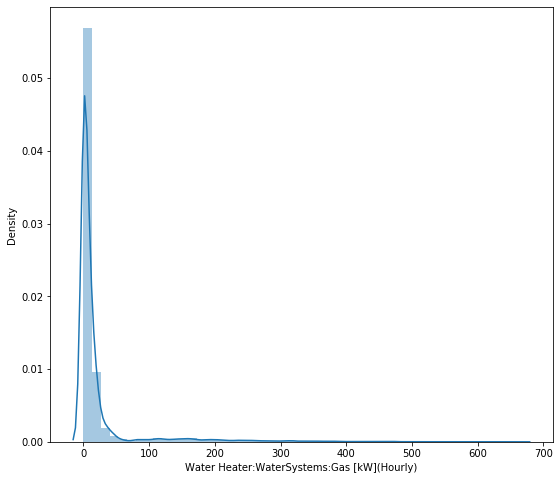

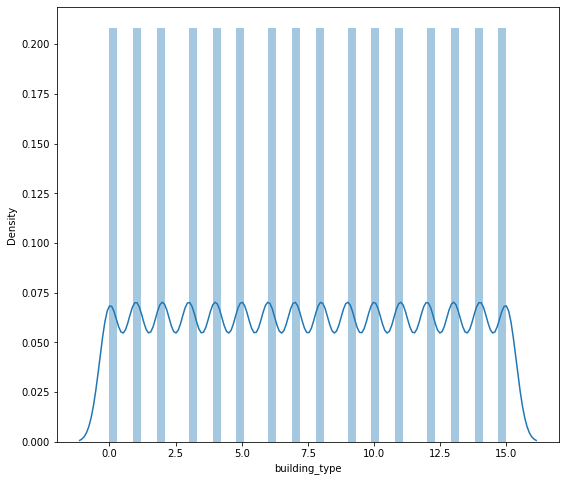

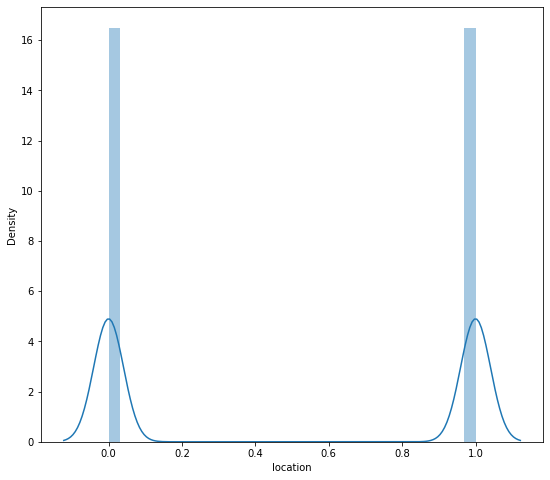

In [29]:
col = df_label_encoded.columns
unplottable_cols = ['Date/Time']
for i in col:
    if (i not in unplottable_cols):
        plt.figure(figsize=(9,8))
        sns.distplot(df_label_encoded[i])

### Feature Importance
To determine what columns have the most impact and what to keep for modeling

In [22]:
df_label_encoded.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,0,0
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,0,0
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,0,0


In [52]:
df_label_encoded_dates_split = df_label_encoded.copy()
df_label_encoded_dates_split.columns = standardize_column_names(df_label_encoded_dates_split.columns)
df_label_encoded_dates_split[['date', 'time']] = df_label_encoded_dates_split['Date_Time'].str.split('  ', expand=True)
df_label_encoded_dates_split[['month', 'day']] = df_label_encoded_dates_split['date'].str.split('/', expand=True)
df_label_encoded_dates_split.drop(columns=['Date_Time', 'date'], inplace=True)
df_label_encoded_dates_split = df_label_encoded_dates_split.reset_index()
df_label_encoded_dates_split.dropna(inplace=True)
df_label_encoded_dates_split.head()

,index,Electricity_Facility_kW_Hourly,Fans_Electricity_kW_Hourly,Cooling_Electricity_kW_Hourly,Heating_Electricity_kW_Hourly,InteriorLights_Electricity_kW_Hourly,InteriorEquipment_Electricity_kW_Hourly,Gas_Facility_kW_Hourly,Heating_Gas_kW_Hourly,InteriorEquipment_Gas_kW_Hourly,Water_Heater_WaterSystems_Gas_kW_Hourly,building_type,location,time,month,day
0,0,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,0,0,01:00:00,01,01
1,1,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0,02:00:00,01,01
2,2,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,0,0,03:00:00,01,01
3,3,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,0,0,04:00:00,01,01
4,4,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,0,0,05:00:00,01,01


In [37]:
df_label_encoded_dates_split.columns

Index(['Electricity_Facility_kW_Hourly', 'Fans_Electricity_kW_Hourly',
       'Cooling_Electricity_kW_Hourly', 'Heating_Electricity_kW_Hourly',
       'InteriorLights_Electricity_kW_Hourly',
       'InteriorEquipment_Electricity_kW_Hourly', 'Gas_Facility_kW_Hourly',
       'Heating_Gas_kW_Hourly', 'InteriorEquipment_Gas_kW_Hourly',
       'Water_Heater_WaterSystems_Gas_kW_Hourly', 'building_type', 'location',
       'time', 'month', 'day'],
      dtype='object')

In [53]:
x = df_label_encoded_dates_split[['Fans_Electricity_kW_Hourly',
       'Cooling_Electricity_kW_Hourly', 'Heating_Electricity_kW_Hourly',
       'InteriorLights_Electricity_kW_Hourly',
       'InteriorEquipment_Electricity_kW_Hourly',
       'Heating_Gas_kW_Hourly', 'InteriorEquipment_Gas_kW_Hourly',
       'Water_Heater_WaterSystems_Gas_kW_Hourly', 'building_type', 'location',
       'month', 'day']]
y = df_label_encoded_dates_split['Electricity_Facility_kW_Hourly'] + df_label_encoded_dates_split['Gas_Facility_kW_Hourly']

In [54]:
x.head()

,Fans_Electricity_kW_Hourly,Cooling_Electricity_kW_Hourly,Heating_Electricity_kW_Hourly,InteriorLights_Electricity_kW_Hourly,InteriorEquipment_Electricity_kW_Hourly,Heating_Gas_kW_Hourly,InteriorEquipment_Gas_kW_Hourly,Water_Heater_WaterSystems_Gas_kW_Hourly,building_type,location,month,day
0,4.001302,0.0,0.0,4.589925,8.1892,51.84623,3.33988,6.350099,0,0,01,01
1,0.000000,0.0,0.0,1.529975,7.4902,0.00000,3.33988,0.020000,0,0,01,01
2,0.000000,0.0,0.0,1.529975,7.4902,0.00000,3.33988,0.592073,0,0,01,01
3,0.000000,0.0,0.0,1.529975,7.4902,0.00000,3.33988,0.020000,0,0,01,01
4,0.000000,0.0,0.0,1.529975,7.4902,0.00000,3.33988,0.592079,0,0,01,01


In [55]:
y.head()

0    84.082047
1    18.104993
2    18.692681
3    18.126150
4    18.850888
dtype: float64

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[5.02930742e-01 1.19289347e-01 8.70039099e-05 9.03597914e-02
 1.38340896e-01 8.27356832e-02 5.98231941e-03 2.44515061e-02
 3.41975721e-02 7.22801014e-04 8.21482198e-04 8.08561814e-05]


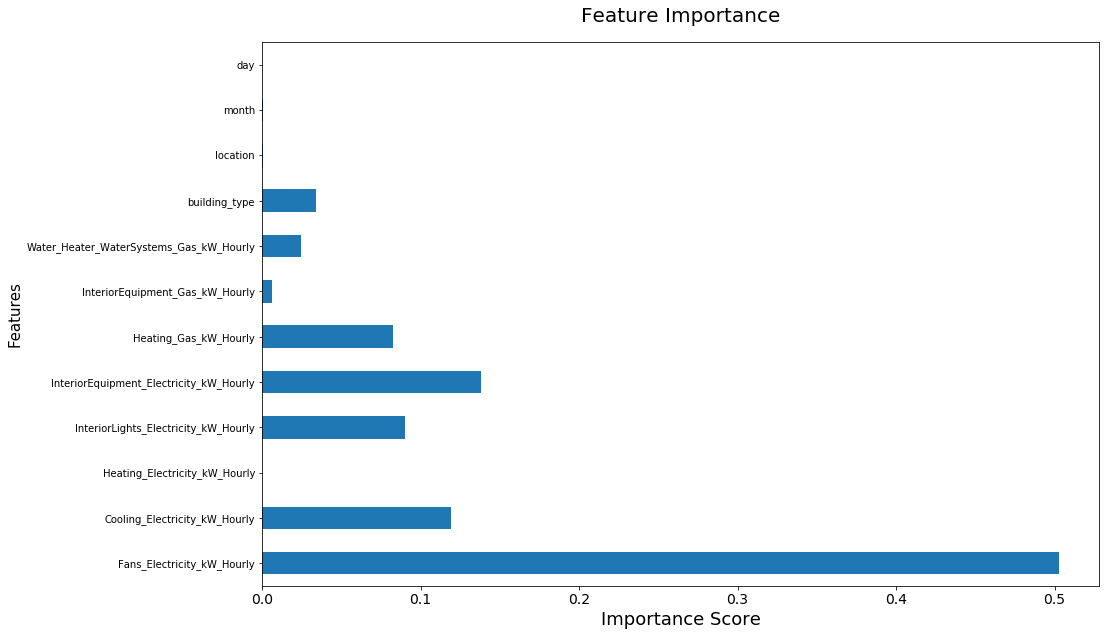

In [61]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(figsize=(15,10), kind='barh')
# plt.show()
# make me bigger
# df_aggregate_only.drop(columns=['location']).groupby(['building_type']).mean().plot(figsize=(15,10), kind='bar')
plt.xlabel('Importance Score', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Features', fontsize=15)
plt.title('Feature Importance', fontsize=20, pad=20)
plt.show()

In [ ]:
# Was gonna remove non important features
# x = df_label_encoded_dates_split[['Fans_Electricity_kW_Hourly',
#        'Cooling_Electricity_kW_Hourly',
#        'InteriorLights_Electricity_kW_Hourly',
#        'InteriorEquipment_Electricity_kW_Hourly',
#        'Heating_Gas_kW_Hourly', 'InteriorEquipment_Gas_kW_Hourly',
#        'Water_Heater_WaterSystems_Gas_kW_Hourly', 'building_type']]
# y = df_label_encoded_dates_split['Electricity_Facility_kW_Hourly'] + df_label_encoded_dates_split['Gas_Facility_kW_Hourly']

### Standardize data

In [62]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = scale.fit_transform(x)
x

array([[-0.67144609, -0.5232082 , -0.17293466, ..., -1.        ,
        -1.60274527, -1.67350325],
       [-0.7944158 , -0.5232082 , -0.17293466, ..., -1.        ,
        -1.60274527, -1.67350325],
       [-0.7944158 , -0.5232082 , -0.17293466, ..., -1.        ,
        -1.60274527, -1.67350325],
       ...,
       [ 0.09193538, -0.5232082 , -0.17293466, ...,  1.        ,
         1.58764752,  1.73704218],
       [-0.7944158 , -0.5232082 , -0.17293466, ...,  1.        ,
         1.58764752,  1.73704218],
       [-0.7944158 , -0.5232082 , -0.17293466, ...,  1.        ,
         1.58764752,  1.73704218]])

### Splitting Data

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [66]:
y_train.shape

(110376,)

### Model Building
1. Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
 
regressor=LinearRegression()
regressor.fit(X_train, y_train)
regressor.coef_

array([ 8.44833271e+01,  1.59594975e+02, -1.40256901e+00,  3.28361517e+01,
        1.08625514e+02,  2.06080712e+02,  2.58037106e+01,  7.22198992e+01,
        2.03844546e+01, -6.91889620e-01, -2.57453502e-01, -1.37547873e-01])

In [69]:
regressor.intercept_

409.74570951230584

In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, x, y, cv=5)

In [71]:
score.mean()

0.7748372469920796

In [72]:
prediction=regressor.predict(X_test)
prediction

array([462.60885523,  49.61536841,  76.61751606, ..., 118.58248736,
       183.81299395, 451.38399845])

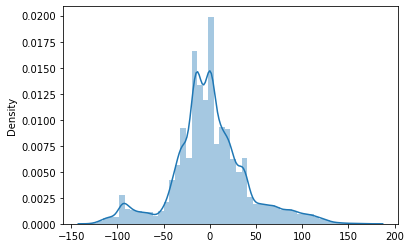

In [73]:
sns.distplot(y_test-prediction)

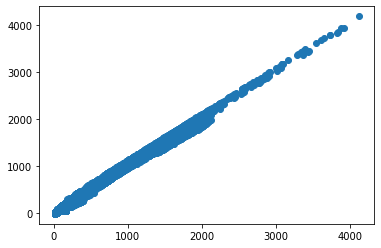

In [74]:
plt.scatter(y_test, prediction)

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 29.54315801611379
MSE: 1699.7236745804141
RMSE: 41.227705182078886


In [78]:
from sklearn.metrics import r2_score
print('r2 score is {}'.format(r2_score(y_test, prediction)))

r2 score is 0.993456637937716


In [26]:
df_time_series = df_label_encoded.copy()
df_time_series.columns = standardize_column_names(df_time_series.columns)
df_time_series.drop(['Fans_Electricity_kW_Hourly',
       'Cooling_Electricity_kW_Hourly', 'Heating_Electricity_kW_Hourly',
       'InteriorLights_Electricity_kW_Hourly',
       'InteriorEquipment_Electricity_kW_Hourly',
       'Heating_Gas_kW_Hourly', 'InteriorEquipment_Gas_kW_Hourly',
       'Water_Heater_WaterSystems_Gas_kW_Hourly', 'building_type', 'location', 'Gas_Facility_kW_Hourly'], inplace=True, axis=1)
df_time_series.rename(columns={'Electricity_Facility_kW_Hourly': "Electricity_Usage"}, inplace=True)
df_time_series

,Date_Time,Electricity_Usage
0,01/01 01:00:00,22.545838
1,01/01 02:00:00,14.745113
2,01/01 03:00:00,14.760728
3,01/01 04:00:00,14.766270
4,01/01 05:00:00,14.918930
...,...,...
280315,12/31 20:00:00,18.511713
280316,12/31 21:00:00,19.655896
280317,12/31 22:00:00,19.063661
280318,12/31 23:00:00,20.442228


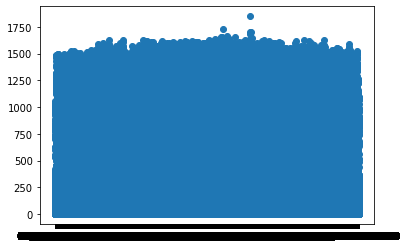

In [34]:
plt.scatter(df_time_series.Date_Time, df_time_series.Electricity_Usage)

In [35]:
df_time_series2 = df_time_series.reset_index()['Electricity_Usage']
df_time_series2.head()

0    22.545838
1    14.745113
2    14.760728
3    14.766270
4    14.918930
Name: Electricity_Usage, dtype: float64

Will be using a min max scaler to work with the energy data. LSTM models are very sensitive to the scale of the data so we will scale the data to values between 0 and 1.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_time_series2 = scaler.fit_transform(np.array(df_time_series2).reshape(-1,1))
df_time_series2

array([[0.0111623 ],
       [0.00693967],
       [0.00694812],
       ...,
       [0.00927735],
       [0.01002359],
       [0.00954534]])

We split data a little differently with time series because the each load value recorded is based on time and the new values are dependent on the previous values recorded. Using train test split with cross validation or random seed is more suited to classification problems.

In [31]:
training_size = int(len(df_time_series2) * 0.65) # 65% training size
test_size = len(df_time_series2) - training_size
train_data, test_data = df_time_series2[0:training_size,:], df_time_series2[training_size:len(df_time_series2),:1]

In [37]:
training_size

182208

In [33]:
test_size

98112

### Data Preprocessing

We preprocess the data to
For example, our train_data may include hourly energy values 22, 14, 17, 13 and our test data may have 18, 19, 19, 20 So if we wanted to forecast what the next value is in the time series, we need to say how many previous values the new value is dependent on. This is called the time_step variable. So if we have a time_step of 3 and we use train data, 3 features will be created 22, 14, 17 and the output variable will be the next hour value 13. In the next iteration we shift to the right by one value 14, 17, 13 and output the next value.

In [40]:
def create_dataset_matrix(dataset, time_step=1):
    # Convert an array of values into a dataset matrix
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
time_step = 100
X_train, y_train = create_dataset_matrix(train_data, time_step)
X_test, y_test = create_dataset_matrix(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(182107, 100)
(182107,)


(None, None)

In [44]:
# Need to reshape into 3d array in order to feed to LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [46]:
!pip install tensorflow

^C


In [50]:
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
 668/2846 [======>.......................] - ETA: 14:54 - loss: 0.0045

KeyboardInterrupt: 

Successfully ran two energy forecasting models
<a href="https://colab.research.google.com/drive/1dlBipwifuyiSTwegVutA1jaRM8wyU2nl?usp=sharing">ARIMA</a> and <a href="https://colab.research.google.com/drive/1_p2CZZI0pcQpdSdLWd6cHwseY1qt7LgY?usp=sharing" target="blank">LSTM</a>